# Data Preprocessing

In [2]:
import os
import pandas as pd

/tmp/ipykernel_83442/3571106454.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
nasa_battery = pd.read_csv('datasets/B0005.csv')

In [4]:
# convert date to numeric function
def convert_date_to_numeric(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    df[column_name] = df[column_name].astype('int64') // 1e9
    return df

In [5]:
# clean data by converting to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
nasa_battery['type'] = label_encoder.fit_transform(nasa_battery['type'])
nasa_battery = nasa_battery.dropna(subset=['type'])
nasa_battery['type'] = nasa_battery['type'].astype(int)

In [6]:
# remove all columns with type 2
nasa_battery = nasa_battery[nasa_battery.type != 2]

In [7]:
# drop NA columns
nasa_battery = nasa_battery.dropna(axis=1, how='all')

In [8]:
nasa_battery

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,start_time,ambient_temp,Capacity
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,0,2008-04-02 13:08:17.000920,24,NaN
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,0,2008-04-02 13:08:17.000920,24,NaN
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,0,2008-04-02 13:08:17.000920,24,NaN
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,0,2008-04-02 13:08:17.000920,24,NaN
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,0,2008-04-02 13:08:17.000920,24,NaN
...,...,...,...,...,...,...,...,...,...,...
604797,0.236356,-0.003484,23.372048,0.000,0.003,0.000,0,2008-05-28 11:09:42.000045,24,NaN
604798,0.003365,-0.001496,23.369434,0.000,0.003,2.547,0,2008-05-28 11:09:42.000045,24,NaN
604799,4.985137,0.000506,23.386535,0.000,5.002,5.500,0,2008-05-28 11:09:42.000045,24,NaN
604800,4.984720,0.000442,23.386983,-0.002,5.002,8.312,0,2008-05-28 11:09:42.000045,24,NaN


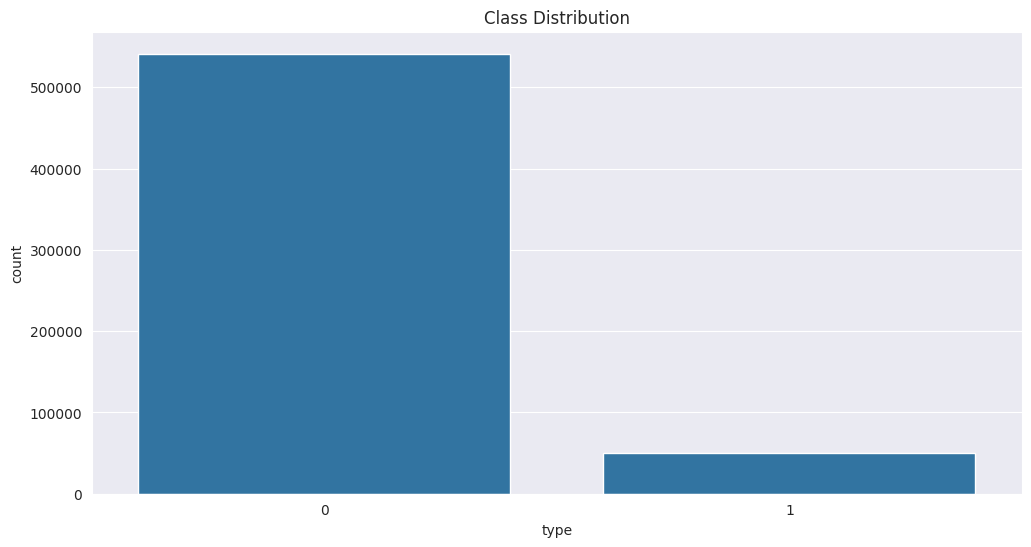

In [9]:
# plot class distributions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title("Class Distribution")
sns.countplot(x="type", data=nasa_battery)
plt.show()

In [10]:
# corr data
corr_data = nasa_battery.drop(['start_time', 'Capacity'], axis=1)

In [13]:
# create train test split
from sklearn.model_selection import train_test_split

X = nasa_battery.drop(['type', 'start_time', 'Capacity'], axis=1)
y = nasa_battery['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
nasa_battery.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,ambient_temp,Capacity
count,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.0,50285.000000
mean,4.103945,0.369404,26.369701,0.634476,4.024930,4763.856934,0.085019,24.0,1.560345
std,0.213469,0.907558,2.772424,0.737029,1.208825,3147.859026,0.278910,0.0,0.182380
min,0.003365,-4.479660,23.214802,-4.468000,0.000000,0.000000,0.000000,24.0,1.287453
25%,4.089426,0.040636,24.488485,0.057000,4.240000,1928.175750,0.000000,24.0,1.386229
50%,4.205140,0.171961,25.479630,0.261000,4.305000,4467.515500,0.000000,24.0,1.538237
75%,4.205908,1.259778,27.348768,1.498000,4.656000,7503.824000,0.000000,24.0,1.746871
max,8.393141,1.531301,41.450232,1.998400,5.002000,10807.328000,1.000000,24.0,1.856487


In [15]:
# check types
X_train.dtypes

Voltage_measured        float64
Current_measured        float64
Temperature_measured    float64
Current_charge          float64
Voltage_charge          float64
Time                    float64
ambient_temp              int64
dtype: object

In [16]:
# check for missing values
X_train.isnull().sum()

# convert non-numeric columns to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == type(object):
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])


# impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

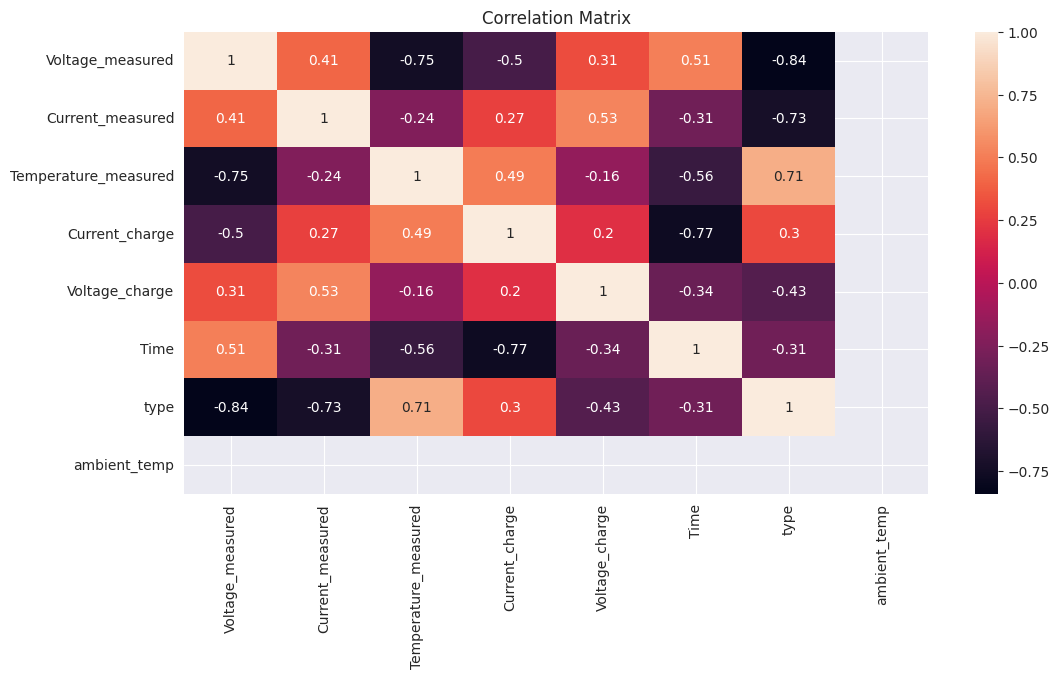

In [17]:
# plot correlation matrix of training data
test = pd.DataFrame(corr_data)
test.corr()
plt.figure(figsize=(12, 6))
plt.title("Correlation Matrix")
# use column names as labels
test.columns = corr_data.columns
sns.heatmap(test.corr(), annot=True)
plt.show()

# Random Forest

In [137]:
# train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [138]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108221
           1       1.00      1.00      1.00     10071

    accuracy                           1.00    118292
   macro avg       1.00      1.00      1.00    118292
weighted avg       1.00      1.00      1.00    118292



<Axes: >

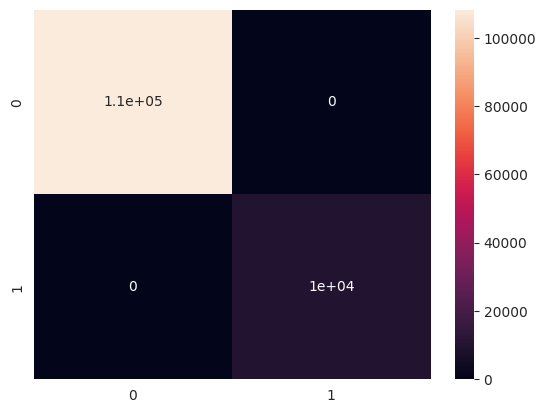

In [139]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

### Interpretation of the data and the classfier

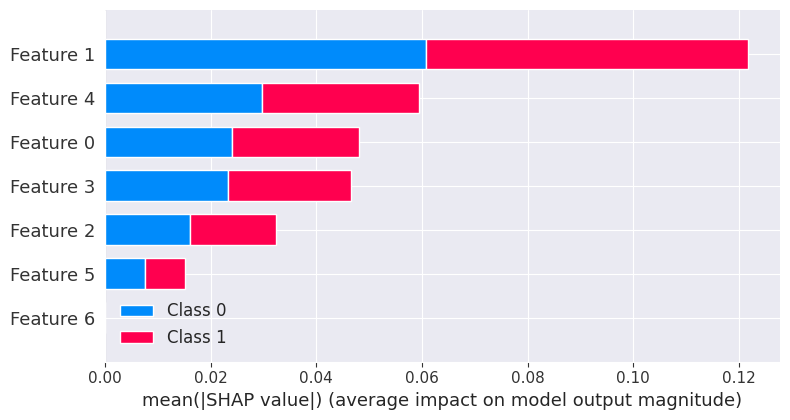

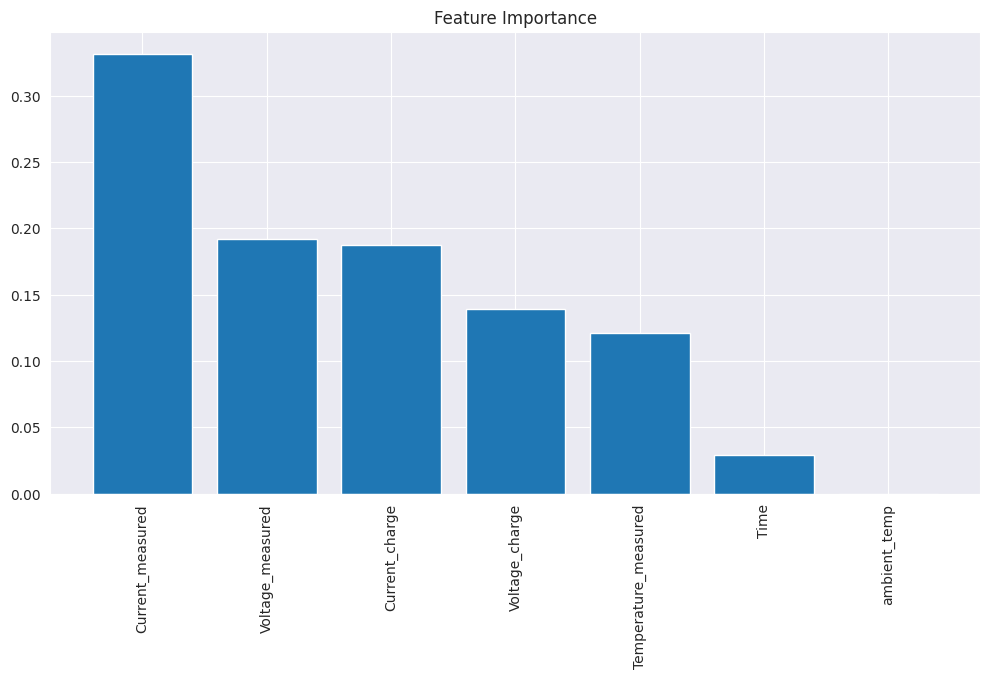

In [142]:
# check feature importance using SHAP
import shap
import numpy as np
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

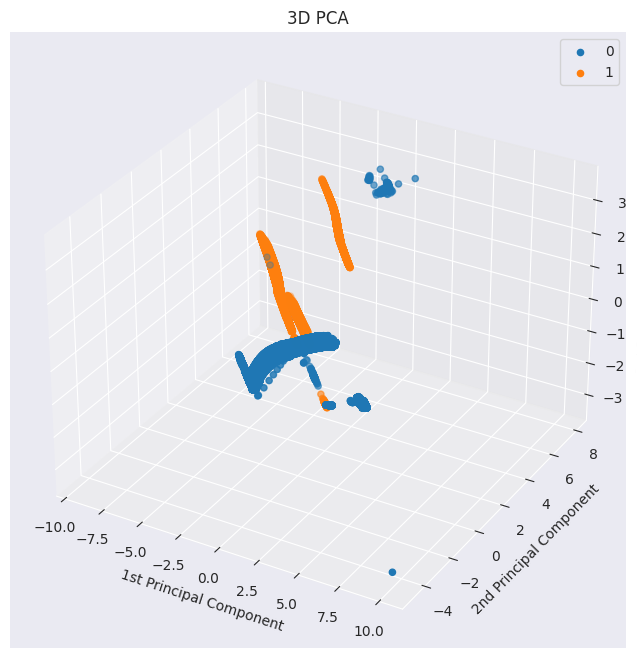

In [19]:
# use PCA to reduce dimensionality and plot
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], X_train_pca[y_train == label, 2], label=label)

plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

# KNN Classifier

### Testing the KNN classifier as sanity check

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate learning model (k = 1)
classifier = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform')
# n_neighbors = number of neighbors to use (K)
# p = Power parameter for the Minkowski metric. 
#     When p = 1, this is equivalent to using manhattan_distance (l1), 
#     and euclidean_distance (l2) for p = 2. 
# weights = weight function used in prediction
#     When = ‘uniform’: All points in each neighborhood are weighted equally.
#     When = ‘distance’: weight points by the inverse of their distance. 
#                        in this case, closer neighbors of a query point will have a greater 
#                        influence than neighbors which are further away.

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [167]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.
